In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
df= pd.read_csv('Salary.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
df['education-num']

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name: education-num, Length: 32561, dtype: int64

In [ ]:
df['Salary'] = df['']

In [19]:
df.describe().drop(['fnlwgt','education-num'],axis = 1)

,age,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
plt.subplot(221)
sns

<AxesSubplot:>

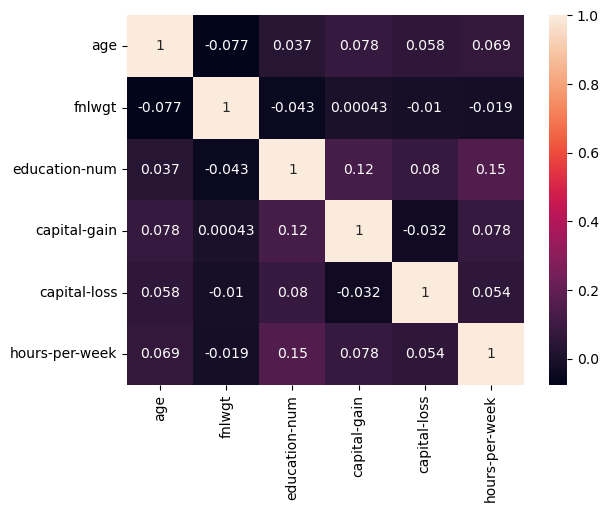

In [11]:
#Alta correlação no modelo
sns.heatmap(df.corr(),annot = True)

In [37]:
# Regressão linear no modelo
y = df.iloc[:,0].values
x = df.iloc[:,1].values
x

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465], dtype=int64)

In [38]:
x= x.reshape(-1,1)
x
modelo = LinearRegression()
modelo.fit(x,y)


LinearRegression()

In [39]:
#Beta zero 
# É o intercepto de estimação, portanto mostra o valor autônomo de Y, ou seja o valor de Y independente do valor de X, 
#logo,-2.970 é o Y autônomo ou seja, o valor que Y toma independente do valor alcançado de X
modelo.intercept_

-2.970145958081991

In [42]:
#Beta1
#É a inclinação da reta de Estimação, portanto mostra a variação de Y quando X varia em uma unidade. Logo 0.00011 mostra que
#Y aumenta em 0.00011 unidade (metade de X) A medida que x aumenta 1 unidade em média
modelo.coef_

array([0.00011053])

In [44]:
#R^2
modelo.score(x,y)

0.9651633106751443

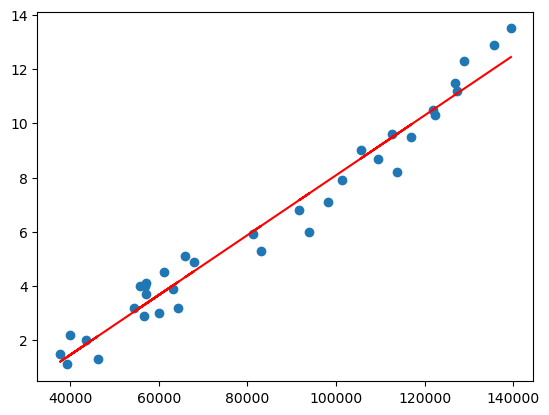

In [53]:
plt.scatter(x,y)
plt.plot(x,modelo.predict(x),color = 'red')

In [55]:
y_pred = modelo.predict(X_test)

NameError: name 'X_test' is not defined

In [44]:
import statsmodels.api as sm

In [49]:
modelo = sm.OLS(df['YearsExperience'],df.drop(['YearsExperience'], axis = 1))
res = modelo.fit()
res

In [51]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:        YearsExperience   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1122.
Date:                Fri, 17 Mar 2023   Prob (F-statistic):                    1.26e-27
Time:                        01:05:23   Log-Likelihood:                         -57.266
No. Observations:                  35   AIC:                                      116.5
Df Residuals:                      34   BIC:                                      118.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Verificamos que R-squared é alto o que nos diz que ele é muito explicativo

In [ ]:
# Analise Final 
# Quando a pessoa não tem experiencia ela terá despesa de pelo menos -2.97